ketheley 6487 picoammeter with voltage source test

In [138]:
%matplotlib inline
from import_all import *
import visa
rm = visa.ResourceManager("/Library/Frameworks/Visa.framework/VISA")
print rm.list_resources()
my_instrument = rm.open_resource('GPIB0::22::INSTR')
print(my_instrument.query("*IDN?"))

(u'GPIB0::22::INSTR',)
KEITHLEY INSTRUMENTS INC.,MODEL 6487,1207197,A06   Jun 20 2006 15:08:40/A02  /C/G



In [123]:
my_instrument.timeout = int(5 * 1000 * 2)
inpt = my_instrument.write('*RST') #reset
inpt = my_instrument.write('SOUR:VOLT:SWE:STAR 1')
inpt = my_instrument.write('SOUR:VOLT:SWE:STOP 10')
inpt = my_instrument.write('SOUR:VOLT:SWE:STEP 1')
inpt = my_instrument.write('SOUR:VOLT:SWE:DEL 0.1')
inpt = my_instrument.write('ARM:COUN INF')
#inpt = my_instrument.write('FORM:ELEM READ, VSO')
inpt = my_instrument.write('SOUR:VOLT:SWE:INIT')
inpt = my_instrument.write('SYST:ZCH OFF')
#inpt = my_instrument.write('INIT')
#outp = my_instrument.query('FETC?')
#inpt = my_instrument.write('*RST')

In [119]:
inpt = my_instrument.write('*RST') #reset
#outp = my_instrument.query('TRAC:DATA?')
#print outp

In [115]:
outp = my_instrument.query('SOUR:VOLT:SWE:STAT?')

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

why it does not answer back after INIT??

In [110]:
#working script
def meas_curr(volt, rang=10, ilim=2.5e-3):
    #inpt = my_instrument.write('*RST') 
    inpt = my_instrument.write('SOUR:VOLT:RANG ' + str(rang))
    inpt = my_instrument.write('SOUR:VOLT ' + str(volt))
    inpt = my_instrument.write('SOUR:VOLT:ILIM ' + str(ilim))
    inpt = my_instrument.write('SOUR:VOLT:STAT ON')
    inpt = my_instrument.write('SYST:ZCH OFF')
    outp = my_instrument.query('READ?')
    print volt, outp
    inpt = my_instrument.write('SOUR:VOLT:STAT OFF')
    return volt, outp

In [164]:
from import_all import *
def meas_curr_sweep(v_start, v_end, v_step,
                    rang=10, ilim=2.5e-3, graph=True):
    inpt = my_instrument.write('*RST')
    inpt = my_instrument.write('SOUR:VOLT:RANG ' + str(rang))
    inpt = my_instrument.write('SOUR:VOLT:ILIM ' + str(ilim))
    
    volt_list = np.arange(v_start, v_end+v_step, v_step)
    current_list_raw = []
    for volt in volt_list:
        inpt = my_instrument.write('SOUR:VOLT ' + str(volt))
        inpt = my_instrument.write('SOUR:VOLT:STAT ON')
        inpt = my_instrument.write('SYST:ZCH OFF')
        outp = my_instrument.query('READ?')
        
        current = float(outp.split(',')[0][:-1])
        current_list_raw.append(current)
        print volt, current
    
    current_list = np.array(current_list_raw)
    
    fit = np.polyfit(current_list, volt_list, 1)
    print 'linear fit results: %0.2e [Ohm], residue %0.2e [V]' %(fit[0], fit[1])
    resistivity = fit[0]
    fit_line = fit[0] * current_list + fit[1]
    
    if graph:
        f, ax = plt.subplots()
        ax.plot(current_list, volt_list, 'o', color='b',)
        ax.plot(current_list, fit_line, 'r')
        ax.set_xlabel('Current [A]')
        ax.set_ylabel('Voltage [V]')
    
    return volt_list, current_list, resistivity
    

-1.0 -4.910188e-08
-0.5 -2.520117e-08
0.0 -1.464023e-09
0.5 2.197955e-08
1.0 4.535755e-08
linear fit results: 21177007.721 [Ohm], residue 0.036 [V]


ValueError: too many values to unpack

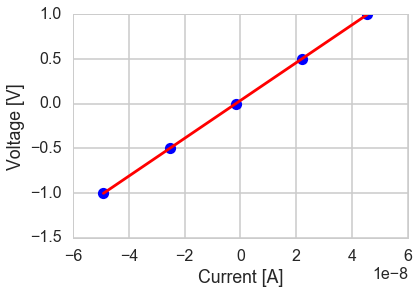

In [160]:
v, c, r = meas_curr_sweep(-1,1,0.5)

-1.0 -1.477883e-10
-0.5 -9.324197e-11
0.0 -1.720907e-11
0.5 5.438864e-11
1.0 1.249162e-10
linear fit results: 7.197e+09 [Ohm], residue 1.136e-01 [V]


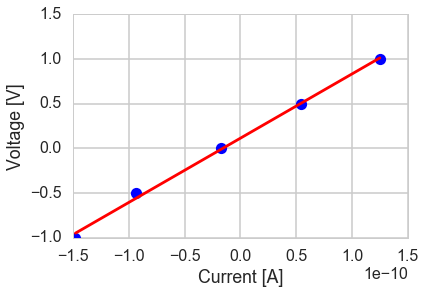

In [163]:
v, c, r = meas_curr_sweep(-1,1,0.5)

In [132]:
from import_all import *
print np.arange(1,10, 1.2)
print(thihs)

[ 1.   2.2  3.4  4.6  5.8  7.   8.2  9.4]


In [ ]:
from import_all import *np.linspace

In [124]:
inpt = my_instrument.write('*RST') 
for volt in range(-10,10):
    v, o = meas_curr(volt)

-10 +8.930103E-14A,+9.610645E+01,+2.560000E+02

-9 +8.088971E-13A,+9.731738E+01,+2.560000E+02

-8 -1.837151E-12A,+9.770020E+01,+2.560000E+02

-7 +2.380857E-12A,+9.806543E+01,+2.560000E+02

-6 +7.667803E-13A,+9.843164E+01,+2.560000E+02

-5 -1.973382E-13A,+9.879688E+01,+2.560000E+02

-4 +1.066411E-12A,+9.916211E+01,+2.560000E+02

-3 +7.220561E-13A,+9.952734E+01,+2.560000E+02

-2 +3.831158E-13A,+9.989258E+01,+2.560000E+02

-1 -3.624431E-13A,+1.002754E+02,+2.560000E+02

0 +2.044925E-12A,+1.006387E+02,+0.000000E+00

1 +1.690018E-14A,+1.010029E+02,+0.000000E+00

2 +2.268827E-13A,+1.013672E+02,+0.000000E+00

3 +4.107928E-13A,+1.017334E+02,+0.000000E+00

4 +3.389935E-13A,+1.020986E+02,+0.000000E+00

5 +1.113141E-12A,+1.024639E+02,+0.000000E+00

6 +8.669374E-14A,+1.028291E+02,+0.000000E+00

7 +5.279974E-14A,+1.031943E+02,+0.000000E+00

8 +1.005321E-13A,+1.035596E+02,+0.000000E+00

9 +3.374689E-14A,+1.039238E+02,+0.000000E+00



In [53]:
inpt = my_instrument.write('*RST')
#outp = my_instrument.query('*IDN?')

In [51]:
outp = my_instrument.query('FETC?')

In [55]:
print outp

+3.463901E-15A,+2.631064E+02,+0.000000E+00



In [192]:
import gpib
reload(gpib)
pam = gpib.Picoammeter()

6487 confirmed


"test" is an unique filename!
-1.0 -8.408173e-11
-0.5 -5.35128e-11
0.0 -1.220974e-11
0.5 2.652917e-11
1.0 6.593308e-11
linear fit results: 1.31e+10 [Ohm], residue 1.51e-01 [V]


(array([-1. , -0.5,  0. ,  0.5,  1. ]),
 array([ -8.40817300e-11,  -5.35128000e-11,  -1.22097400e-11,
          2.65291700e-11,   6.59330800e-11]),
 13127843761.667423)

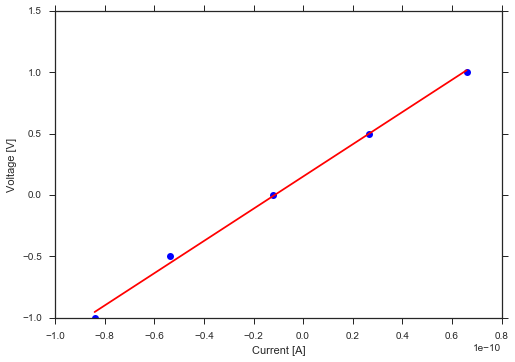

In [193]:
path = '/Users/nakayamahidenori/Desktop/test'
pam.meas_curr_sweep(path, 'test', -1, 1, 0.5)